In [1]:
#Import ALL Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load Dataset
df=sns.load_dataset('iris')
df
#The main purpose of this dataset is to identify the species of a flower based on its physical characteristics
#This dataset has 150 flower samples, and there are three species

#Each species has 50 samples, which means the dataset is balanced and there is no bias toward any species.

#Every flower has two main parts we are studying:
#Sepal – the outer protective part of the flower
#Petal – the colorful inner part

#We measure:
#Sepal Length
#Sepal Width
#Petal Length
#Petal Width

#These measurements help us compare flowers and observe natural differences among species.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
#Overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1200x600 with 0 Axes>

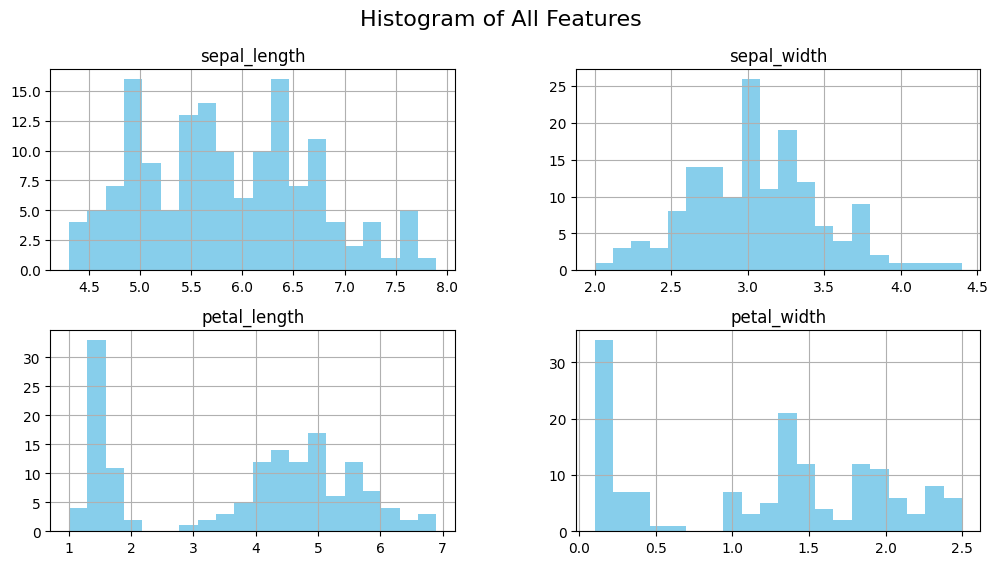

In [7]:
plt.figure(figsize=(12,6))
df.hist(bins=20, figsize=(12,6), color='skyblue')
plt.suptitle("Histogram of All Features", fontsize=16)
plt.show()
#From the histograms, we see that petal features (length and width) show very clear separation between species, forming distinct clusters.
#In contrast, sepal features do not show such clear groupings, meaning they are less effective for classifying the flower species.

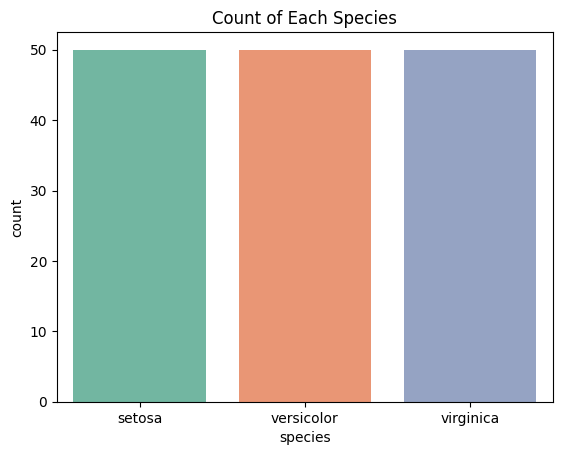

In [8]:
sns.countplot(data=df, x='species', hue='species', palette='Set2')
plt.title("Count of Each Species")
plt.show()
#All three species have equal samples (50 each).

Text(0.5, 1.02, 'Pairwise Relationship between Features')

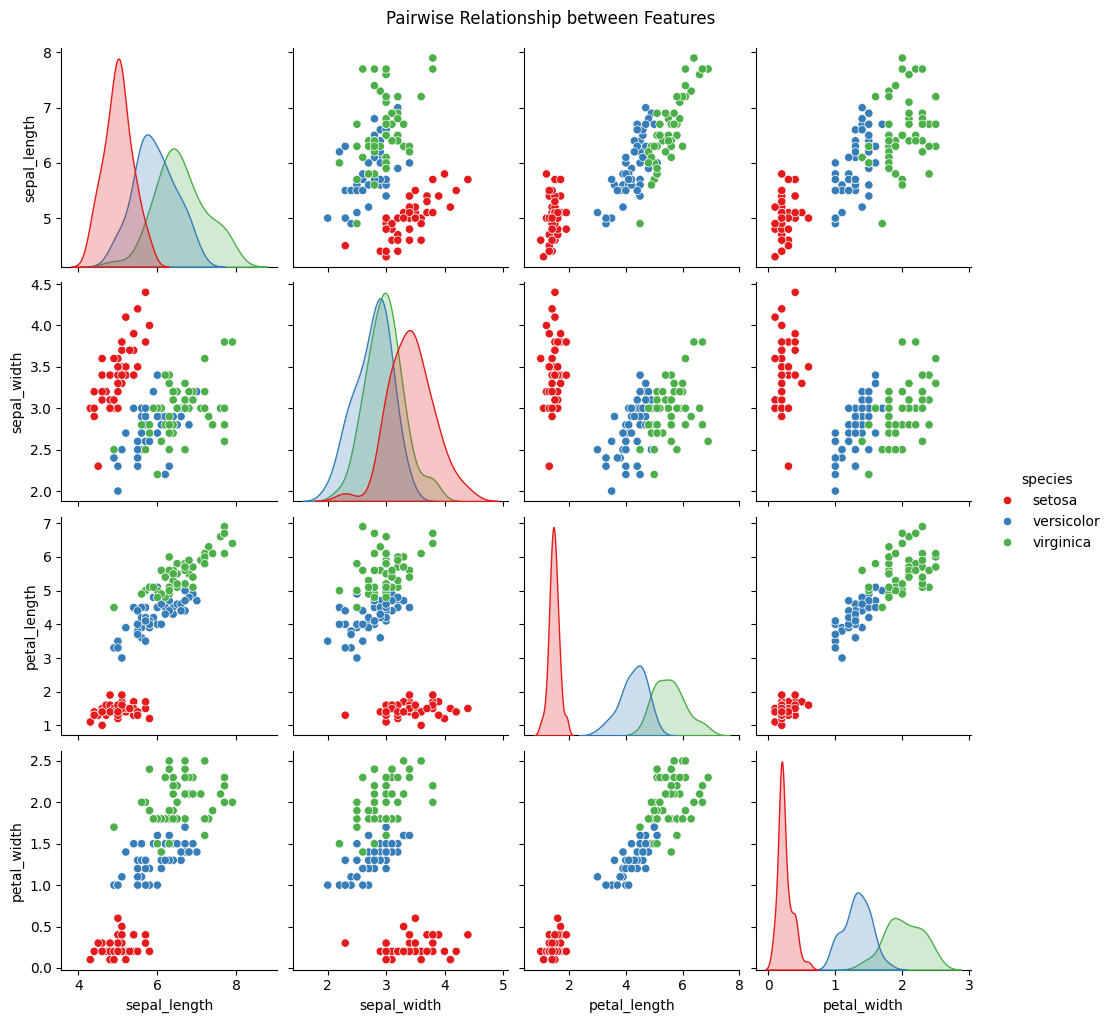

In [9]:
sns.pairplot(df, hue="species", palette="Set1")
plt.suptitle("Pairwise Relationship between Features", y=1.02)
#Iris Setosa forms a completely separate cluster, especially when we look at petal measurements.
#This means Setosa is very easy to identify.
#Iris Versicolor and Iris Virginica overlap partially, meaning their features are more similar, and distinguishing them is a bit more challenging.
#We also notice that Petal Length and Petal Width separate species much better than Sepal Length and Width.
#So, petal measurements are more informative for classification.

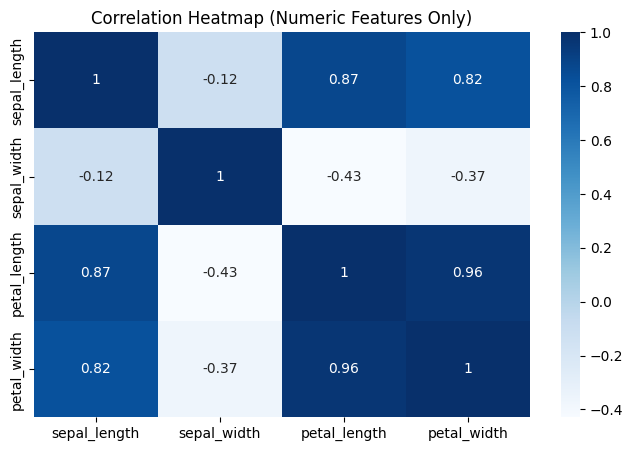

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()
#Petal Length and Petal Width show a strong positive correlation.
#This means if we know one, we can predict the other quite accurately.
#Sepal measurements do not show strong correlation with each other.

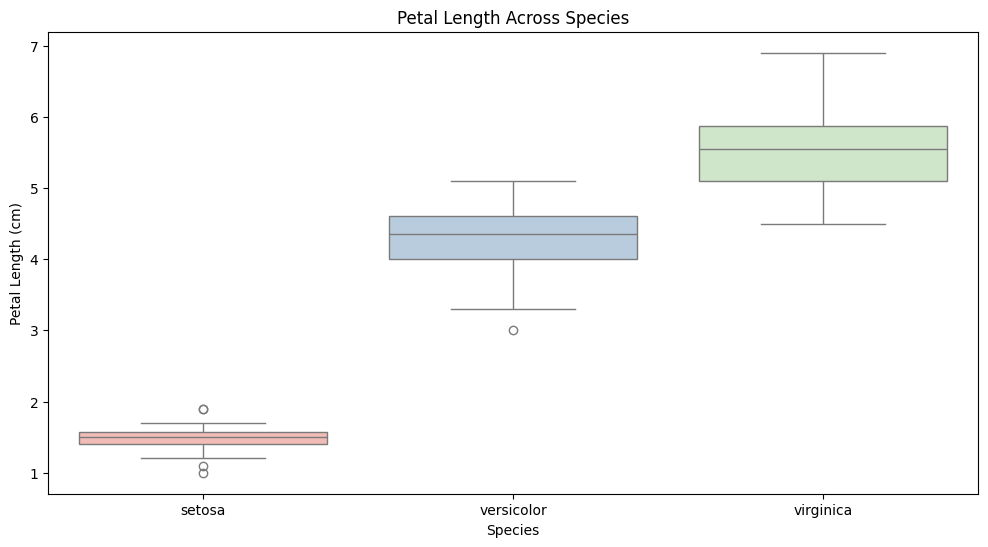

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='species', y='petal_length', hue='species',data=df, palette="Pastel1")
plt.title("Petal Length Across Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()
#Setosa has the smallest petal length and width, with no overlap compared to the other two species.
#Virginica generally has the largest petal measurements.
#Versicolor lies somewhere in the middle, which explains why it overlaps with Virginica in some plots.

#This shows a very clear size progression:
#Setosa → Versicolor → Virginica

In [12]:
#In conclusion, the Iris dataset shows how simple measurements can clearly separate different species of flowers.